In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in data here from your system - in this case some data from La Palma compiled by David Neave

In [2]:
out=pt.import_excel('teneguia1971_py.xlsx', sheet_name="Liquid")
#input_Liqs=out['my_input']
Liquids1=out['Liqs']

out2=pt.import_excel('teneguia1971_py.xlsx', sheet_name="Pyroxene")
#input_Cpxs=out2['my_input']
Cpxs1=out2['Cpxs']
# Calculate Cpx components

out3=pt.import_excel('teneguia1971_py.xlsx', sheet_name="Amphibole")
#input_Amps=out3['my_input']
Amps1=out3['Amps']
Amp_input=out3['my_input']

C:\Users\penny\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Lets plot our data amongst the amphibole calibration datasets

In [3]:
## For Mutch 2016

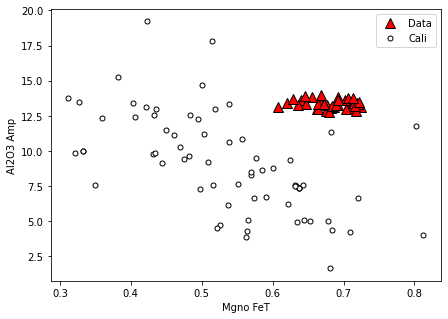

In [7]:
a=pt.generic_cali_plot(df=Amps1, model="Mutch2016",
        x='Mgno_FeT', y='Al2O3_Amp',  order="cali bottom", 
                       alpha_cali=1, alpha_data=1)

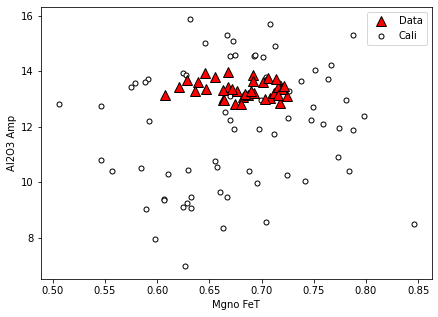

In [10]:
a=pt.generic_cali_plot(df=Amps1, model="Ridolfi2021",
        x='Mgno_FeT', y='Al2O3_Amp',  order="cali bottom", 
                       alpha_cali=1, alpha_data=1)

## Calculate P and T using Petrelli et al. (2020)

In [3]:
# This is the cali dataset, you can check out the columns to see what you can plot. 
Pet_Cali=pt.return_Petrelli2020_cali_dataset()
Pet_Cali.columns

Index(['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'Cr2O3_Liq', 'P2O5_Liq', 'H2O_Liq',
       'Fe3Fet_Liq', 'NiO_Liq', 'CoO_Liq', 'CO2_Liq', 'Sample_ID_Liq',
       'SiO2_Liq_mol_frac', 'MgO_Liq_mol_frac', 'MnO_Liq_mol_frac',
       'FeOt_Liq_mol_frac', 'CaO_Liq_mol_frac', 'Al2O3_Liq_mol_frac',
       'Na2O_Liq_mol_frac', 'K2O_Liq_mol_frac', 'TiO2_Liq_mol_frac',
       'P2O5_Liq_mol_frac', 'Cr2O3_Liq_mol_frac', 'Si_Liq_cat_frac',
       'Mg_Liq_cat_frac', 'Mn_Liq_cat_frac', 'Fet_Liq_cat_frac',
       'Ca_Liq_cat_frac', 'Al_Liq_cat_frac', 'Na_Liq_cat_frac',
       'K_Liq_cat_frac', 'Ti_Liq_cat_frac', 'P_Liq_cat_frac',
       'Cr_Liq_cat_frac', 'Mg_Number_Liq_NoFe3', 'Mg_Number_Liq_Fe3',
       'SiO2_Cpx', 'TiO2_Cpx', 'Al2O3_Cpx', 'FeOt_Cpx', 'MnO_Cpx', 'MgO_Cpx',
       'CaO_Cpx', 'Na2O_Cpx', 'K2O_Cpx', 'Cr2O3_Cpx', 'Sample_ID_Cpx',
       'Si_Cpx_cat_6ox', 'Mg_Cpx_cat_6ox', 'Fet_Cpx_cat_6ox', 'Ca_Cpx_cat_6ox',
       '

In [4]:
PT_Pet20=pt.calculate_cpx_only_press_temp(cpx_comps=Cpxs1, equationP="P_Petrelli2020_Cpx_only",
                                            equationT="T_Petrelli2020_Cpx_only")

Youve selected a P-independent function
Youve selected a T-independent function


## Simplist example, using the default plot template

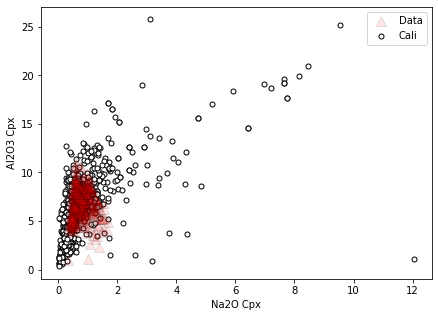

In [9]:
a=pt.generic_cali_plot(df=Cpxs1, model="Petrelli20",
        x='Na2O_Cpx', y='Al2O3_Cpx',  order="cali bottom", alpha_cali=1, alpha_data=0.1)

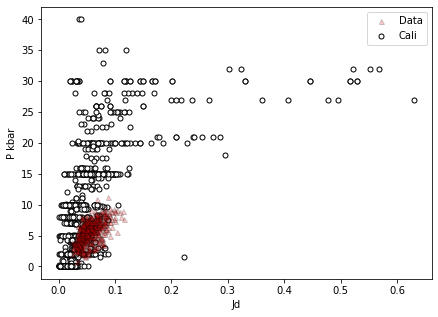

In [26]:
# If you want to use Cpx components make sure you calculate them for your Cpxs

Cpxs1_comps=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs1)

a=pt.generic_cali_plot(df=Cpxs1_comps, model="Petrelli20", P_kbar=PT_Pet20['P_kbar_calc'],
        x='Jd', y='P_kbar', ms_data=5, order="cali bottom", alpha_cali=1, alpha_data=0.2)


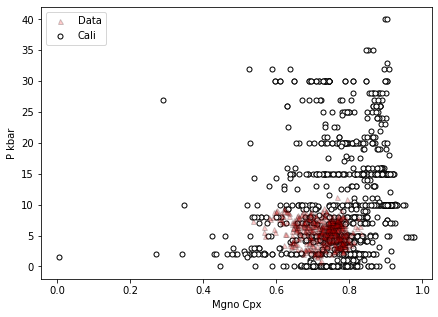

In [27]:
# If you want to use Cpx components make sure you calculate them for your Cpxs

Cpxs1_comps=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs1)

a=pt.generic_cali_plot(df=Cpxs1_comps, model="Petrelli20", P_kbar=PT_Pet20['P_kbar_calc'],
        x='Mgno_Cpx', y='P_kbar', ms_data=5, order="cali bottom", alpha_cali=1, alpha_data=0.2)


## Number with Jd from NA vs. Al

In [19]:
print('Prop in data with Jd from Na')
print(sum( Cpxs1_comps['Jd_from 0=Na, 1=Al']==0)/len(Cpxs1_comps))
print('Prop in cali with Jd from Na')
print(sum(Pet_Cali['Jd_from 0=Na, 1=Al']==0)/len(Pet_Cali))

Prop in data with Jd from Na
0.9320557491289199
Prop in cali with Jd from Na
0.9341176470588235
